### IMPORTING THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',150)

### READING AND ANALYSING THE DATA

In [2]:
Bike=pd.read_csv("day.csv")

In [3]:
# Display the data
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking the shape of the dataset
Bike.shape

(730, 16)

In [5]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Analyse and check if there is any null values in the dataset
Bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### Exploratory Data Analysis

In [9]:
# We can rename the names of the columns in order to improve the readibility
Bike.rename(columns={'mnth':"Month","yr":"Year","hum":"Humidity","temp":"Temperature","cnt":"Total Count","atemp":"feeling temperature"},inplace=True)

In [10]:
Bike.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,weathersit,Temperature,feeling temperature,Humidity,windspeed,casual,registered,Total Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#Dropping few columns which are unnecessary
Bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [12]:
Bike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,Temperature,feeling temperature,Humidity,windspeed,Total Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
Bike.Month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: Month, dtype: int64

In [14]:
Bike.season=Bike.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [15]:
Bike.Month = Bike.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [16]:
Bike.weekday=Bike.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [17]:
Bike.weathersit = Bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snow/rain',4:'Heavy_snow/rain'})

In [18]:
Bike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,Temperature,feeling temperature,Humidity,windspeed,Total Count
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Develop a function in order to create visualizations of the categorical columns against the target variable "cnt"

def plot_var(column):
    print("{} v/s Total Count".format(column))
    plt.figure(figsize = (15,10))
    plt.subplot(2,2,1)
    sns.barplot(column,"Total Count",data=Bike)
    plt.title("Barchart of {} V/s Total count".format(column),fontdict={"fontsize":12})
    
    plt.subplot(2,2,2)
    sns.barplot(column,"Total Count",data=Bike,hue="Year")
    plt.legend(labels=["2018","2019"])
    plt.title("Barchart of {} V/s Total count comparing 2018 & 2019".format(column),fontdict={"fontsize":12})
    
    plt.subplot(2,2,3)
    sns.boxplot(x=column,y="Total Count",data=Bike)
    plt.title("Boxplot of {} V/s Total Count".format(column),fontdict={"fontsize":15})
    plt.show()
    print("___________________________________________________________________________")
    

season v/s Total Count


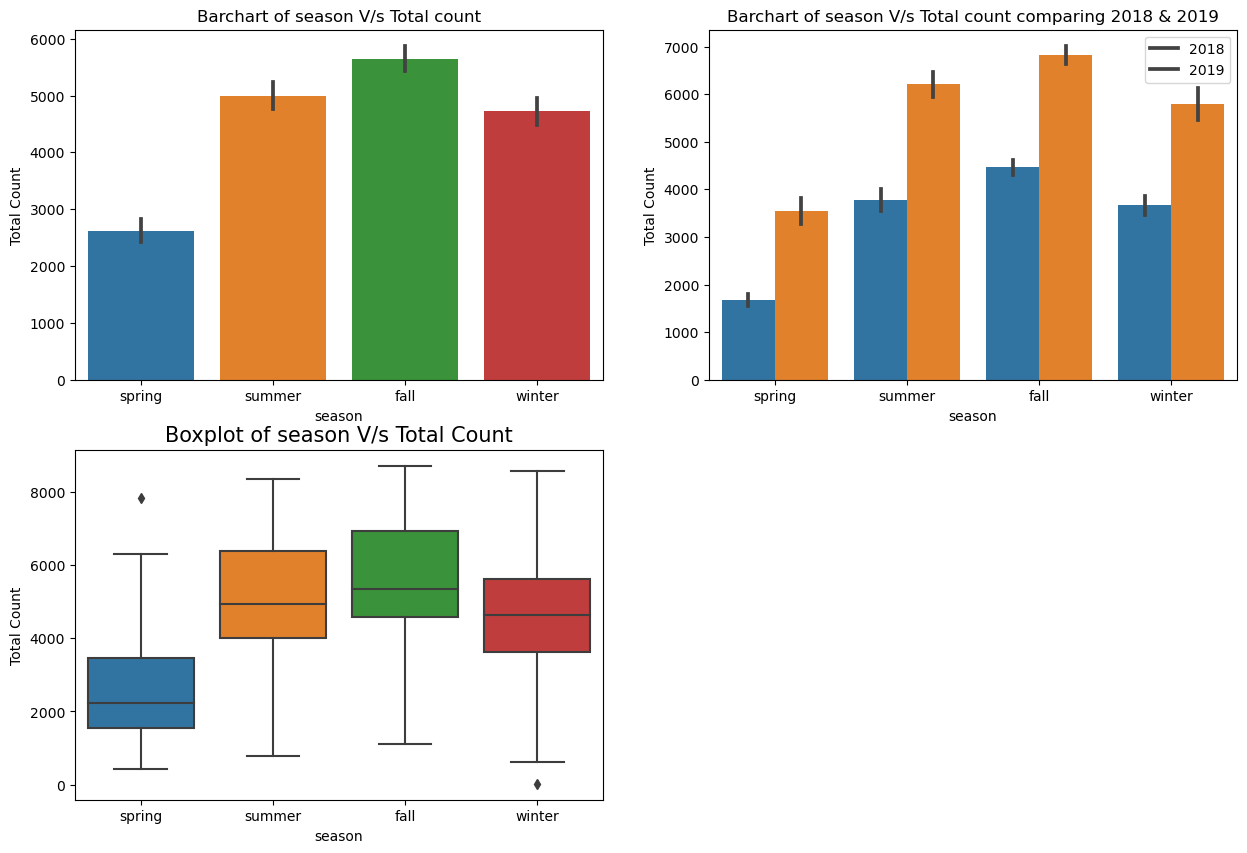

___________________________________________________________________________
Year v/s Total Count


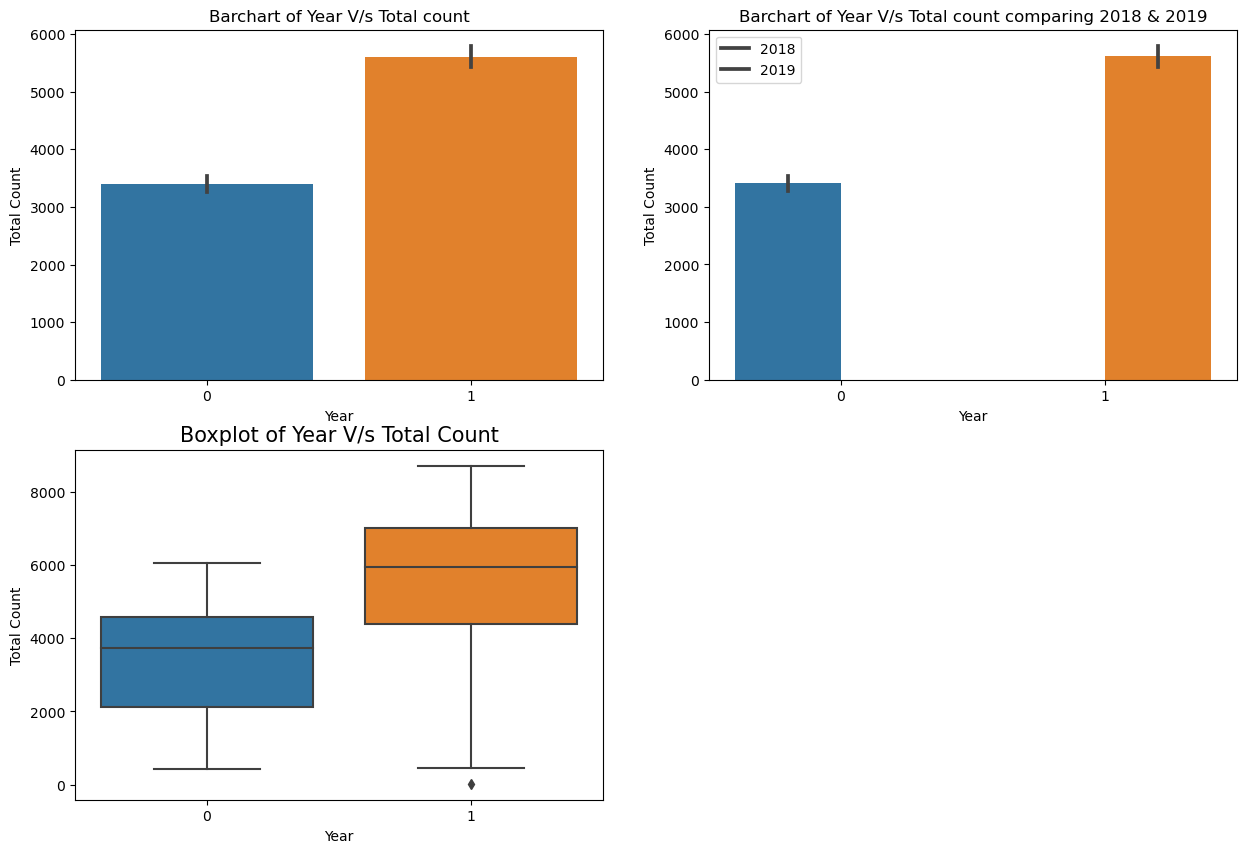

___________________________________________________________________________
Month v/s Total Count


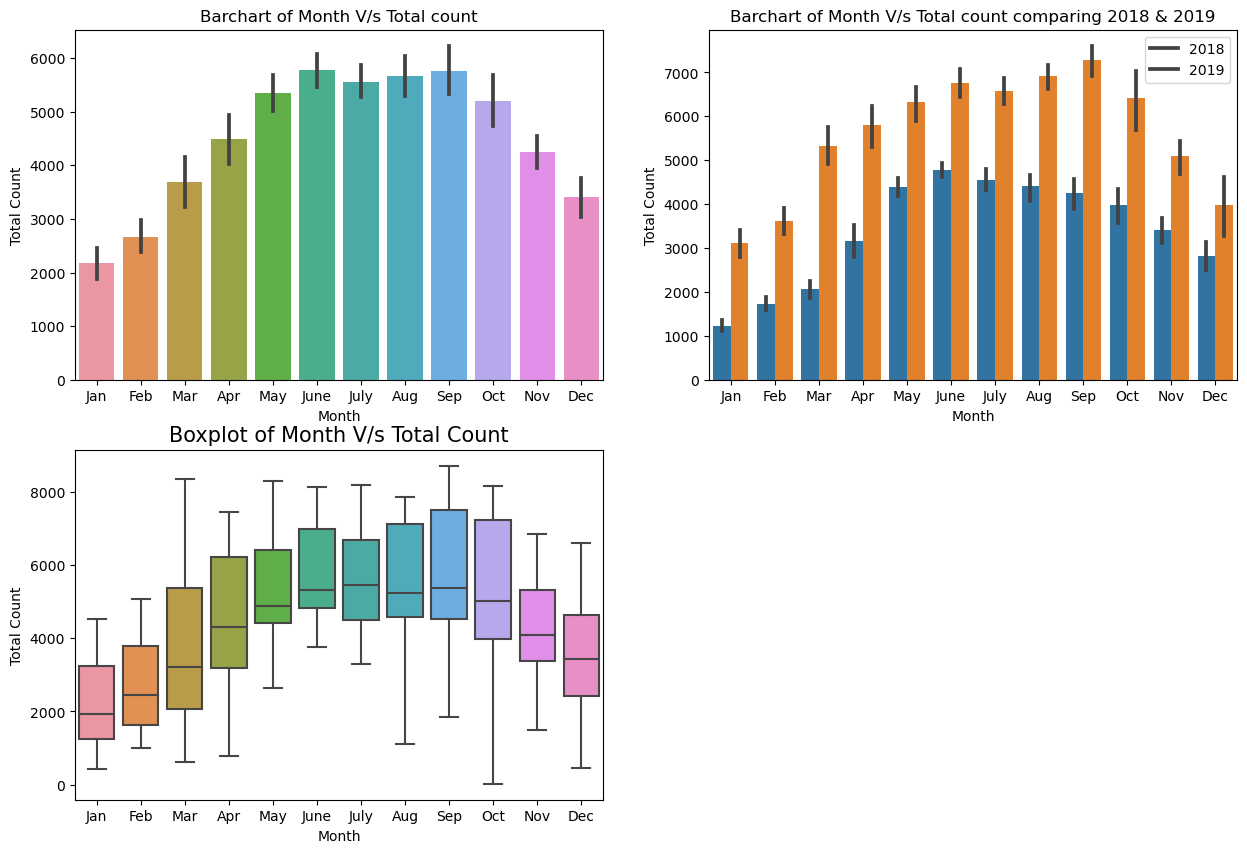

___________________________________________________________________________
holiday v/s Total Count


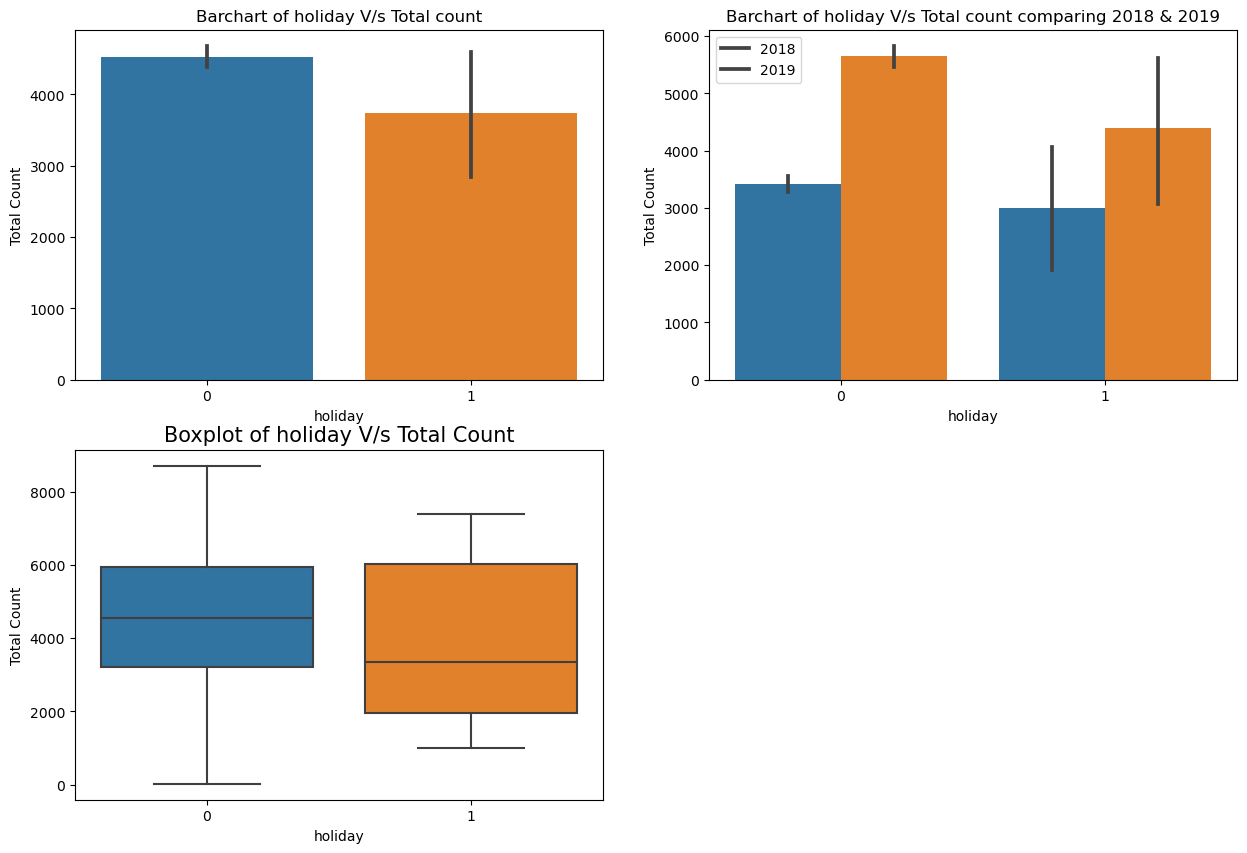

___________________________________________________________________________
weekday v/s Total Count


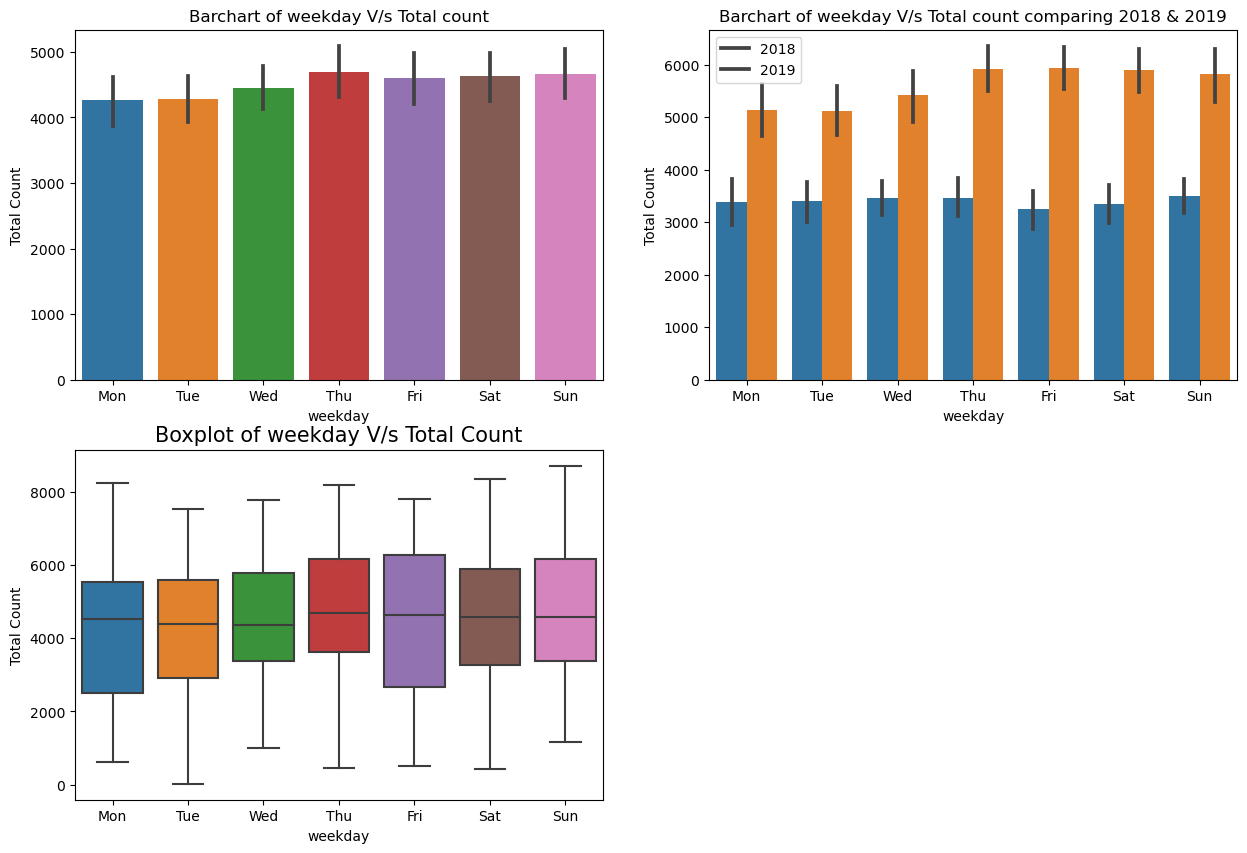

___________________________________________________________________________
workingday v/s Total Count


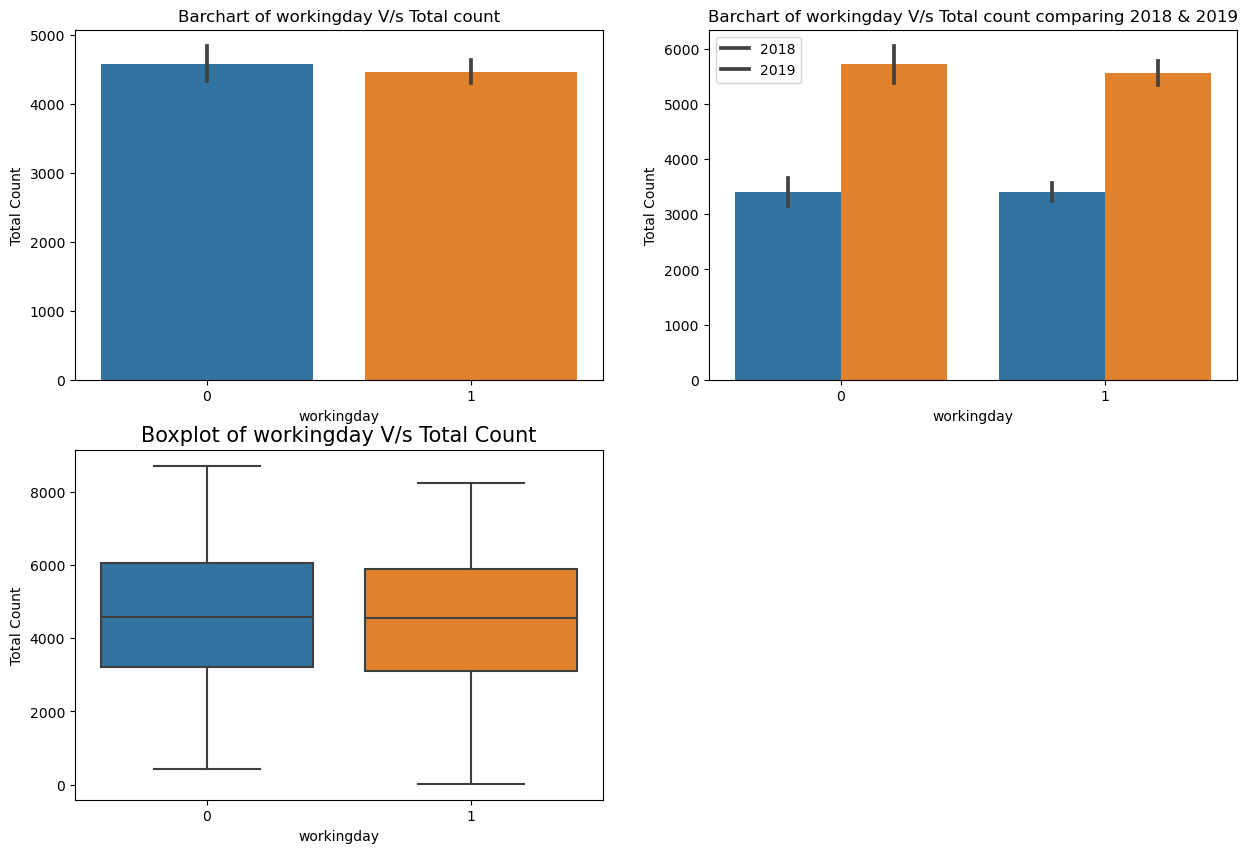

___________________________________________________________________________
weathersit v/s Total Count


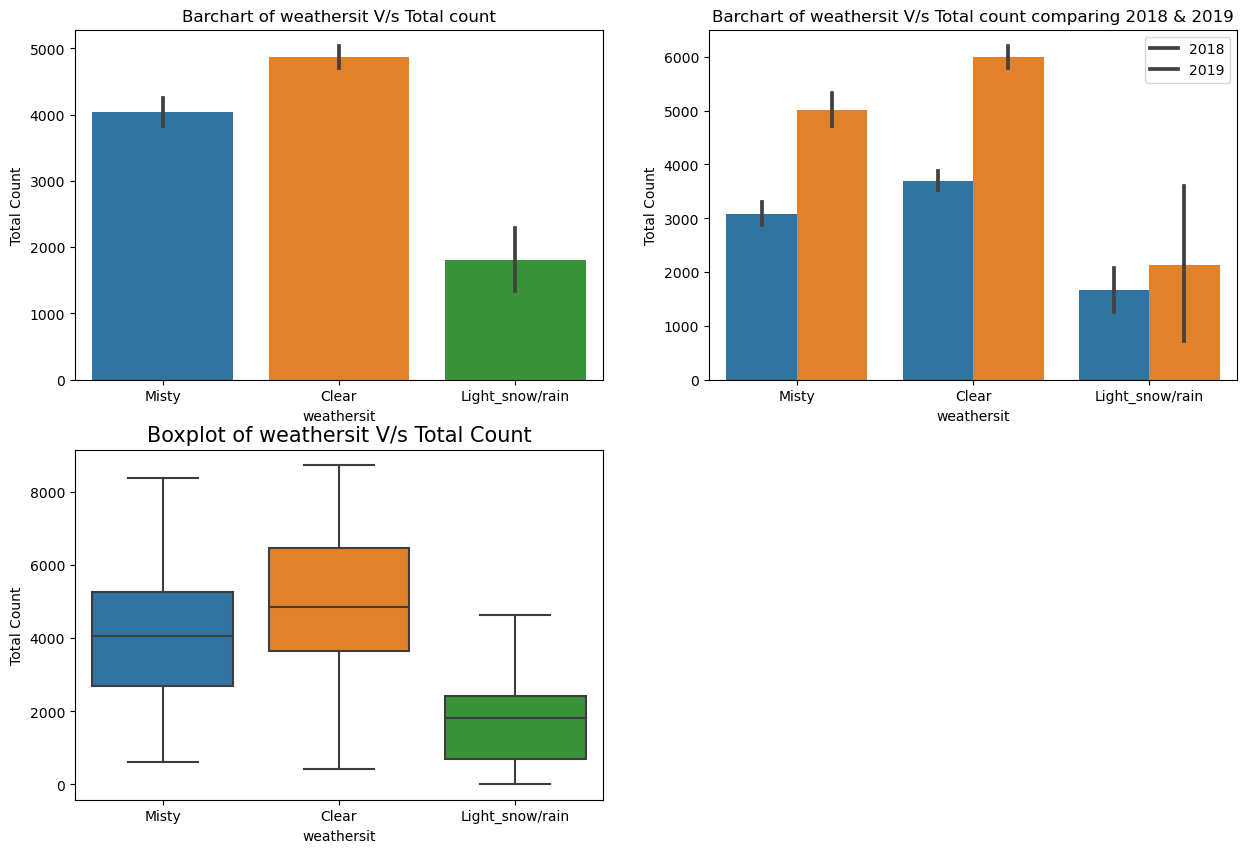

___________________________________________________________________________


In [20]:
cat_var=["season","Year","Month","holiday","weekday","workingday","weathersit"]
for i in cat_var:
    plot_var(i)

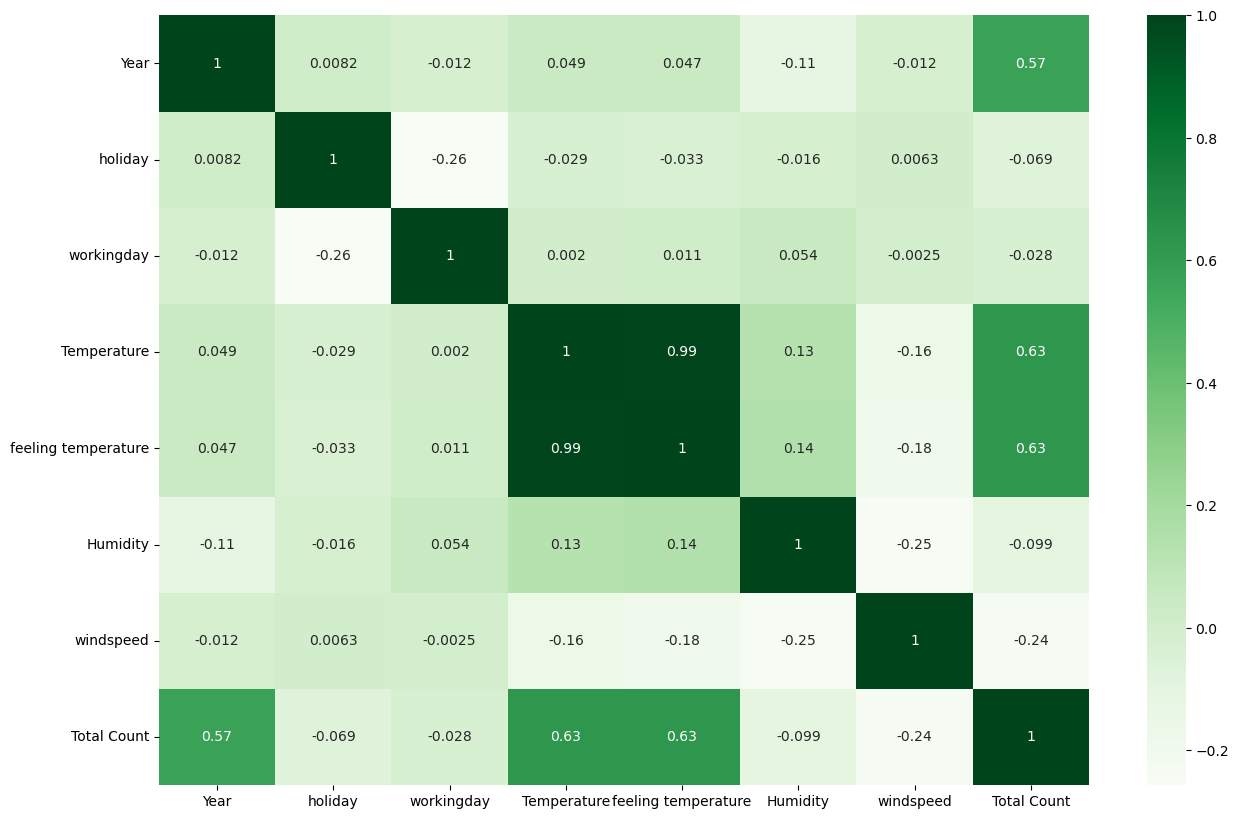

In [21]:
# Plotting a heat map to find the corelation of the features with each other

plt.figure(figsize=[15,10])
sns.heatmap(Bike.corr(),annot=True,cmap="Greens")
plt.show()

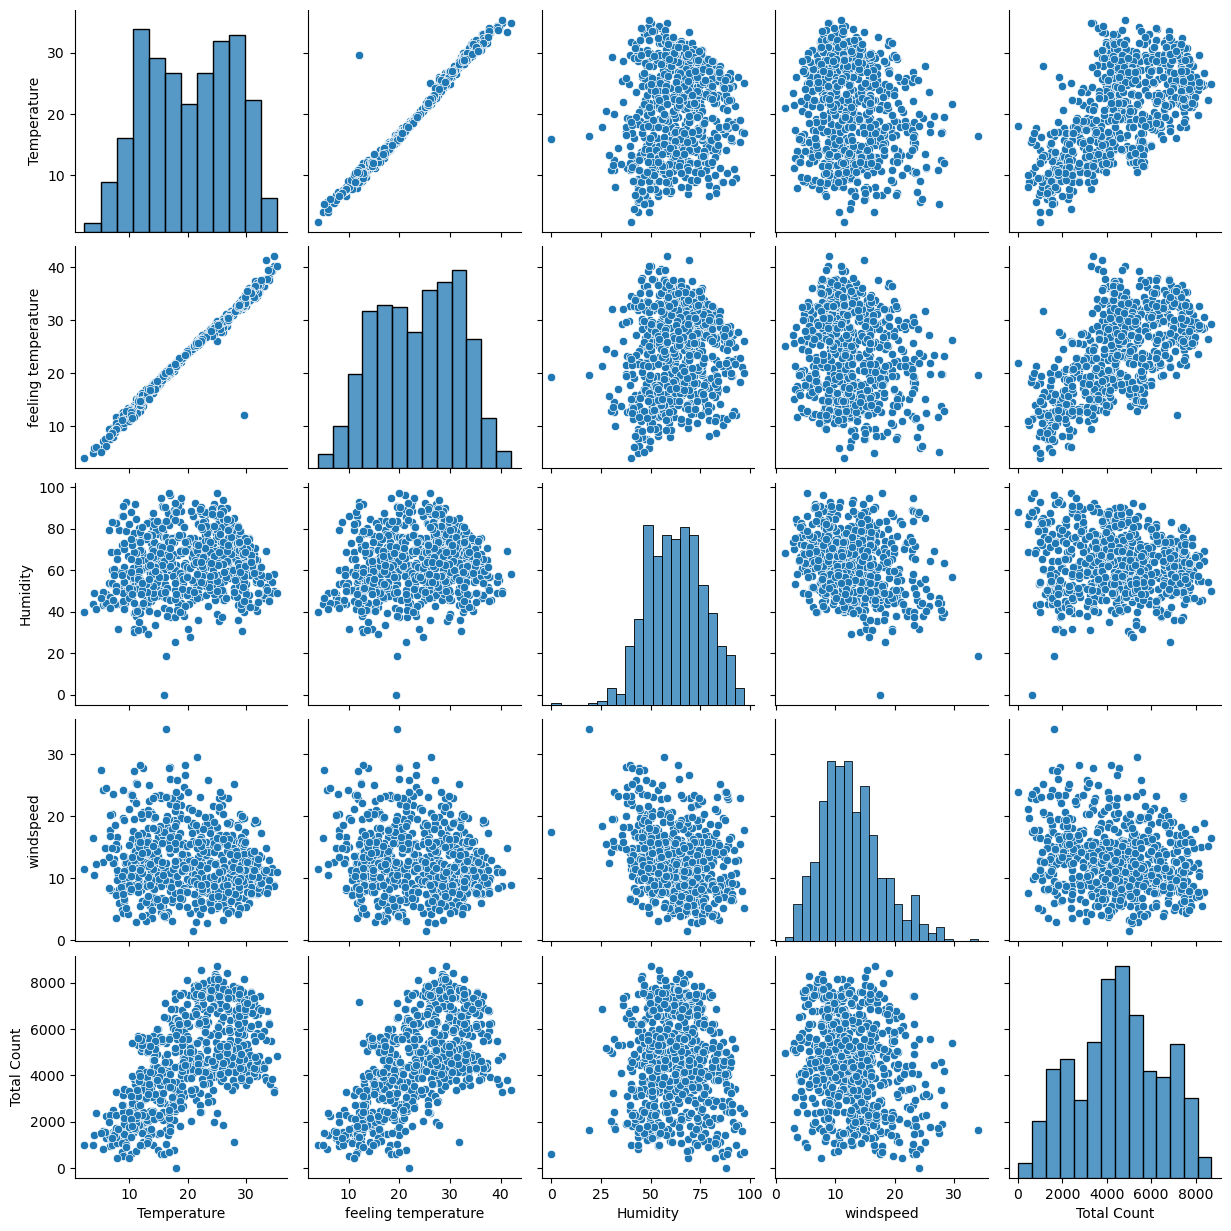

In [22]:
# Analysing /visualising the numerical columns
sns.pairplot(data=Bike,vars=["Temperature","feeling temperature","Humidity","windspeed","Total Count"])
plt.show()

### DATA PREPARATION

In [23]:
Bike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,Temperature,feeling temperature,Humidity,windspeed,Total Count
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Preparing the dummy variables for categorical column
Dummy_var=pd.get_dummies(Bike[['season','weathersit','Month','weekday']],drop_first=True)
Dummy_var.head()

,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
Bike.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,Temperature,feeling temperature,Humidity,windspeed,Total Count
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
# Duplicating the dataset
Bike_1=Bike

In [27]:
Bike_1.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,Temperature,feeling temperature,Humidity,windspeed,Total Count
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [28]:
Bike_1=pd.concat([Bike_1,Dummy_var],axis=1)

In [29]:
Bike_1.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,Temperature,feeling temperature,Humidity,windspeed,Total Count,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
Bike_1.drop(['season','weathersit','Month','weekday'],axis=1,inplace=True)

In [31]:
Bike_1.head()

,Year,holiday,workingday,Temperature,feeling temperature,Humidity,windspeed,Total Count,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
Bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   Temperature                 730 non-null    float64
 4   feeling temperature         730 non-null    float64
 5   Humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   Total Count                 730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  weathersit_Light_snow/rain  730 non-null    uint8  
 12  weathersit_Misty            730 non-null    uint8  
 13  Month_Aug                   730 non

## SPLITTING THE DATA INTO TRAINING & TEST SET AND RESCALING

In [33]:
# Splitting the data into test and train data sets respectively
df_train,df_test=train_test_split(Bike_1,train_size=0.7,random_state=100)

In [34]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [35]:
Bike_1.head()

,Year,holiday,workingday,Temperature,feeling temperature,Humidity,windspeed,Total Count,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# Using the MinMaxscales to rescales the variables
scaler=MinMaxScaler()

In [37]:
col_1=["Temperature","feeling temperature","Humidity","windspeed","Total Count"]

In [38]:
df_train[col_1]=scaler.fit_transform(df_train[col_1])

In [39]:
df_train.head()

,Year,holiday,workingday,Temperature,feeling temperature,Humidity,windspeed,Total Count,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [40]:
df_train.describe()

,Year,holiday,workingday,Temperature,feeling temperature,Humidity,windspeed,Total Count,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,0.345098,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,0.475867,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


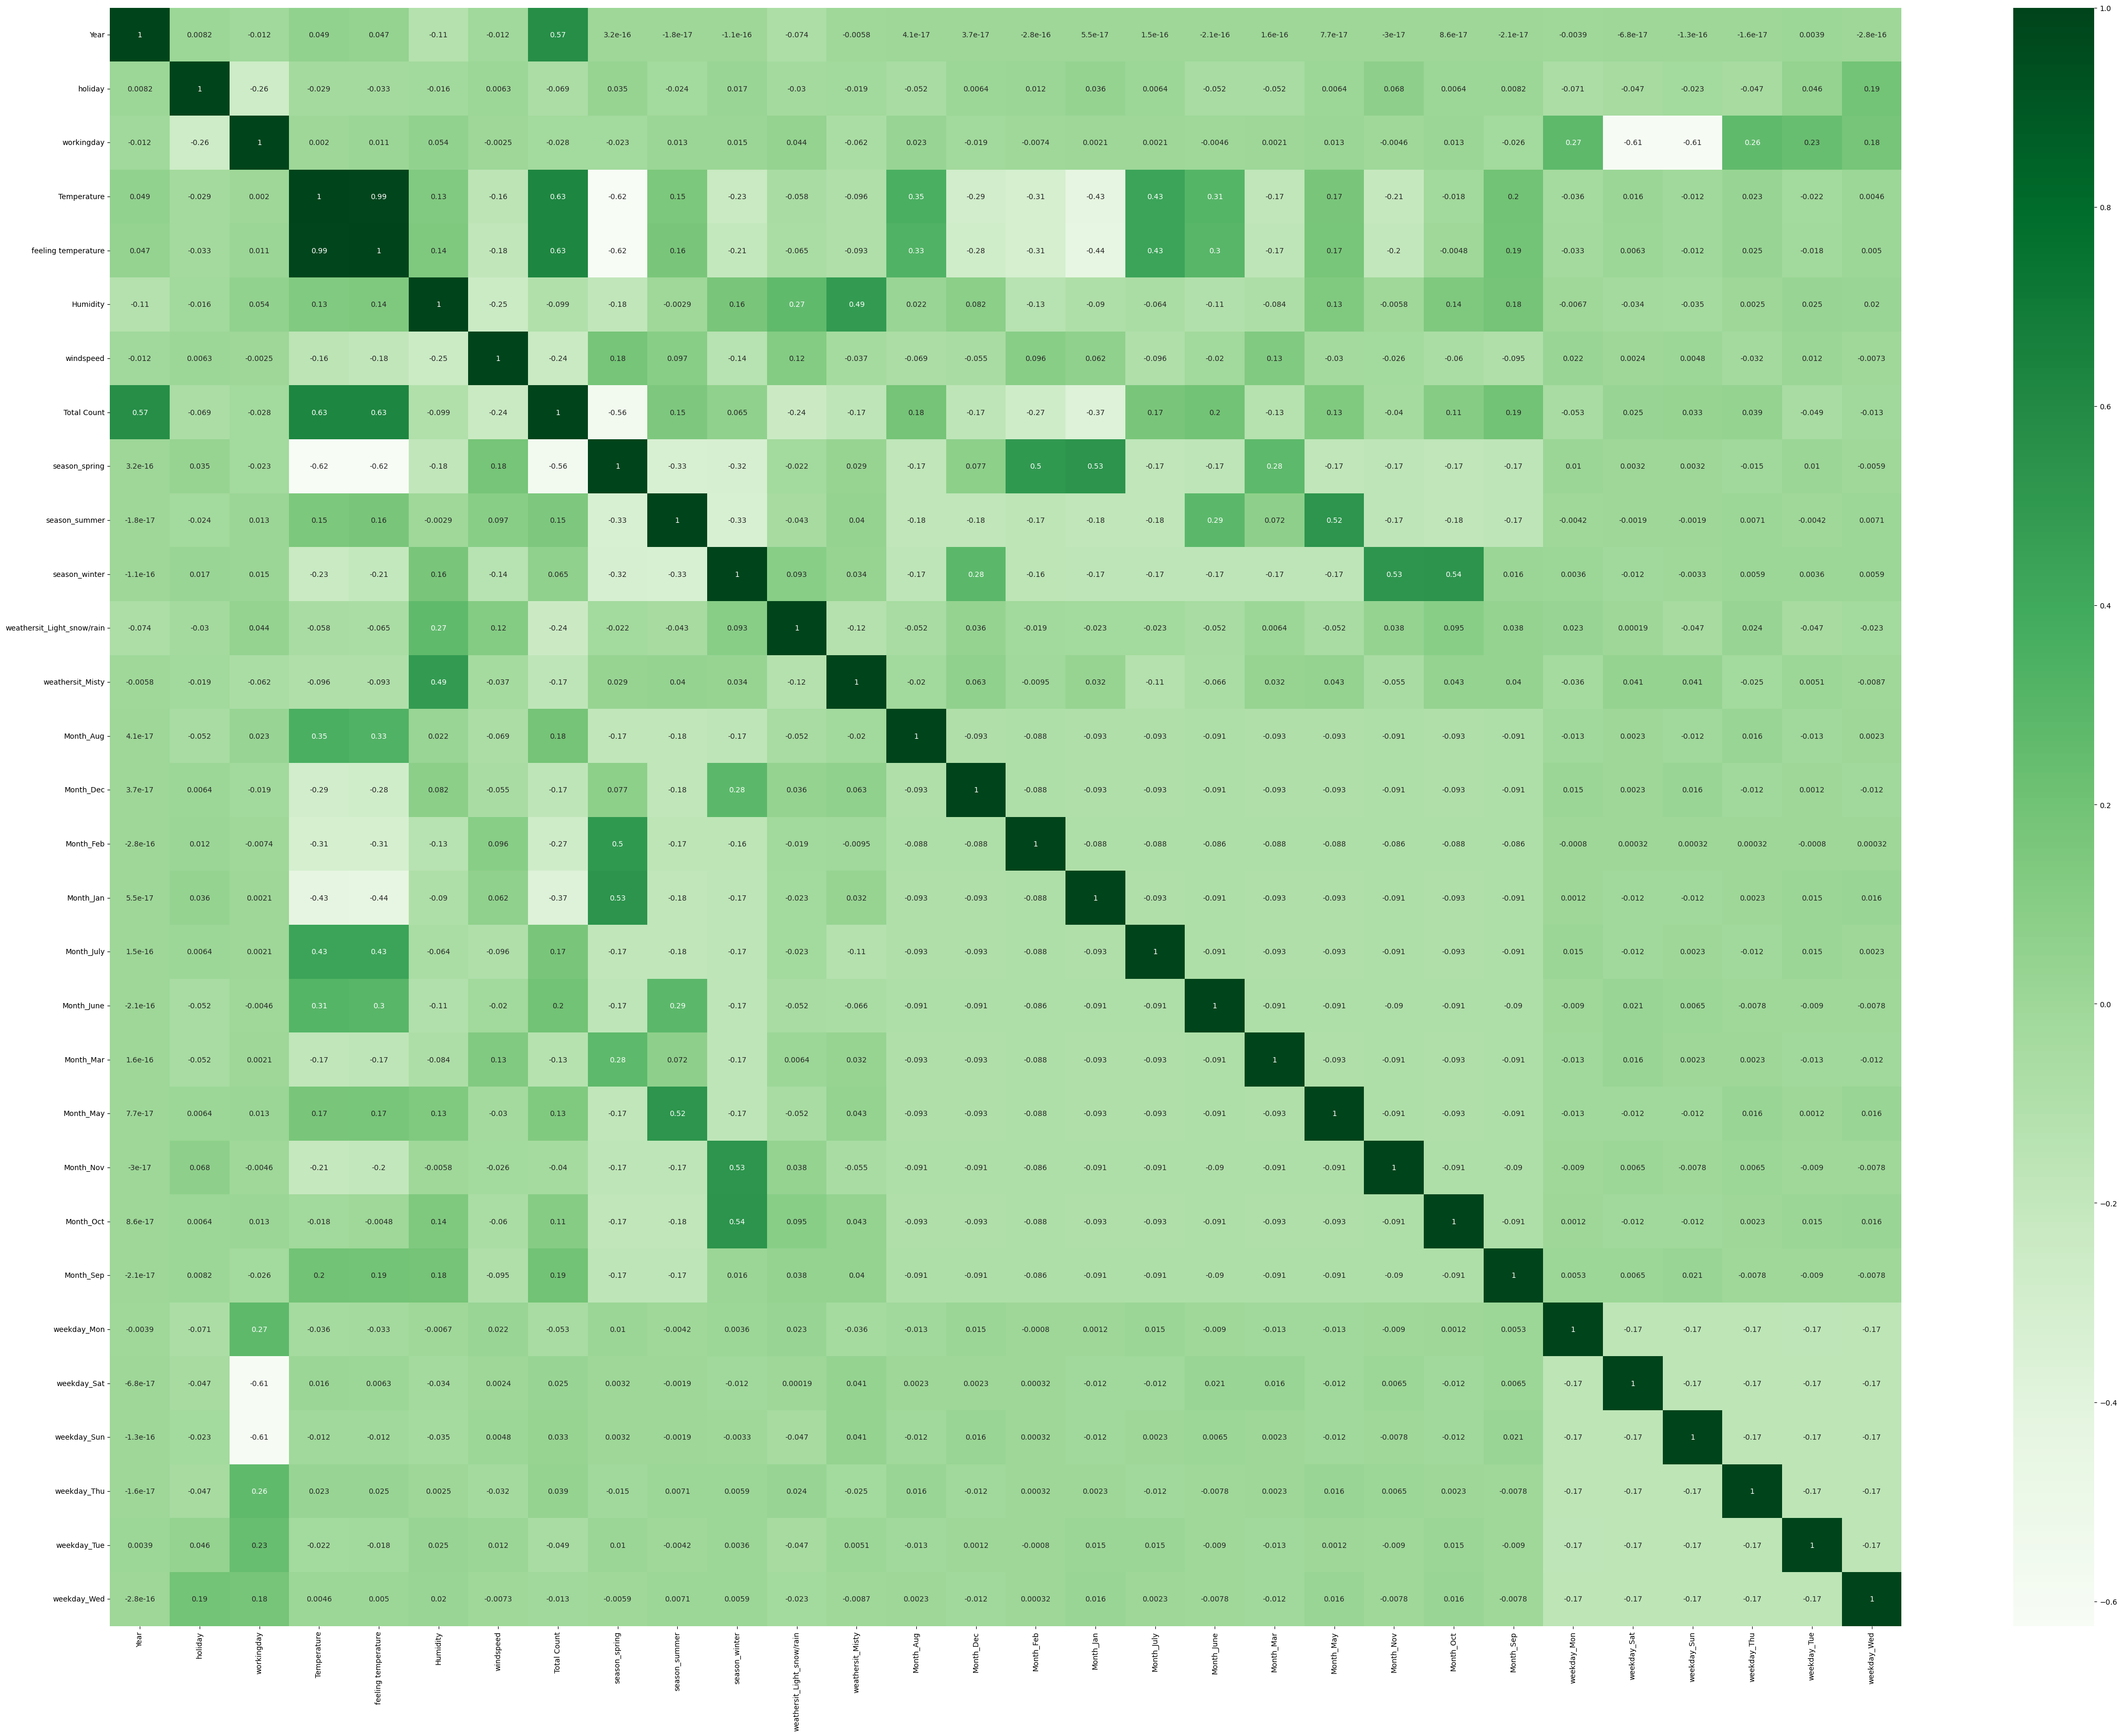

In [41]:
# check for the corelations to review the variables that are highly corelated
plt.figure(figsize=[55,40])
sns.heatmap(Bike_1.corr(),annot=True,cmap="Greens")
plt.show()


In [42]:
# Segregating the independent and dependent variables
y_train=df_train.pop("Total Count")
x_train=df_train

In [43]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: Total Count, dtype: float64

In [44]:
x_train.head()

,Year,holiday,workingday,Temperature,feeling temperature,Humidity,windspeed,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### BULIDING THE MODEL

In [45]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [46]:
rfe=RFE(lm,n_features_to_select=14)
rfe=rfe.fit(x_train,y_train)

In [47]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('Temperature', True, 1),
 ('feeling temperature', False, 4),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light_snow/rain', True, 1),
 ('weathersit_Misty', True, 1),
 ('Month_Aug', False, 11),
 ('Month_Dec', False, 2),
 ('Month_Feb', False, 3),
 ('Month_Jan', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 13),
 ('Month_Mar', False, 16),
 ('Month_May', False, 10),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 14),
 ('Month_Sep', True, 1),
 ('weekday_Mon', False, 9),
 ('weekday_Sat', False, 6),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 15),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 12)]

In [48]:
# enlisting the top 14 predictors of dependent variable(total count)
col_2=x_train.columns[rfe.support_]
col_2

Index(['Year', 'holiday', 'Temperature', 'Humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Light_snow/rain', 'weathersit_Misty', 'Month_Jan',
       'Month_July', 'Month_Nov', 'Month_Sep'],
      dtype='object')

In [49]:
x_train.columns[~rfe.support_]

Index(['workingday', 'feeling temperature', 'Month_Aug', 'Month_Dec',
       'Month_Feb', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [50]:
# Creating x_test dataframe with RFE selected variables
x_train_rfe=x_train[col_2]
x_train_new=x_train[col_2]

In [51]:
x_train_new

,Year,holiday,Temperature,Humidity,windspeed,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Jan,Month_July,Month_Nov,Month_Sep
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,0,1,0,0,0,0
79,0,0,0.462664,0.759870,0.529881,0,1,0,0,1,0,0,0,0


In [52]:
# Adding constant column to X_train_rfe
x_train_rfe=sm.add_constant(x_train_rfe)

In [53]:
x_train_rfe.head()

,const,Year,holiday,Temperature,Humidity,windspeed,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Jan,Month_July,Month_Nov,Month_Sep
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0
111,1.0,0,0,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0


## MODEL

In [54]:
#Building the linear regresion model 
lm=sm.OLS(y_train,x_train_rfe).fit()

In [55]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          4.41e-189
Time:                        13:29:09   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [56]:
# Checking the multicollinearity in the model using VIF
vif = pd.DataFrame()
X=x_train_new
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,Humidity,29.09
2,Temperature,16.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,3.78
6,season_summer,2.80
9,weathersit_Misty,2.29
0,Year,2.09
10,Month_Jan,1.67
12,Month_Nov,1.60


In [57]:
# By reviewing the summary we can see that the P-value of the Month_Nov is very high
x_train_new=x_train_new.drop(["Month_Nov"],axis=1)
x_train_rfe=x_train_rfe.drop(["Month_Nov"],axis=1)

In [58]:
lm=sm.OLS(y_train,x_train_rfe).fit()

In [59]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          7.59e-190
Time:                        13:29:09   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [60]:
# Checking the multicollinearity in the model using VIF
vif = pd.DataFrame()
X=x_train_new
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,Humidity,29.02
2,Temperature,16.71
4,windspeed,4.66
5,season_spring,4.34
7,season_winter,3.36
6,season_summer,2.79
9,weathersit_Misty,2.29
0,Year,2.09
10,Month_Jan,1.67
11,Month_July,1.59


In [61]:
# As humidity has high VIF value it can be dropped
x_train_new=x_train_new.drop(["Humidity"],axis=1)
x_train_rfe=x_train_rfe.drop(["Humidity"],axis=1)

In [62]:
# Building linear regression model and checking the summary
lm=sm.OLS(y_train,x_train_rfe).fit()


In [63]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          8.14e-187
Time:                        13:29:09   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [64]:
# Checking the multicollinearity in the model using VIF
vif = pd.DataFrame()
X=x_train_new
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Temperature,5.13
3,windspeed,4.62
4,season_spring,2.75
5,season_summer,2.24
0,Year,2.07
6,season_winter,1.78
9,Month_Jan,1.61
10,Month_July,1.59
8,weathersit_Misty,1.56
11,Month_Sep,1.34


In [66]:
# P-value of month_jan is high and can be dropped
x_train_new=x_train_new.drop(['Month_Jan'],axis=1)
x_train_rfe=x_train_rfe.drop(['Month_Jan'],axis=1)

MODEL-4

In [67]:
lm=sm.OLS(y_train,x_train_rfe).fit()

In [68]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          5.06e-187
Time:                        13:42:59   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [69]:
# Checking the multicollinearity in the model using VIF
vif = pd.DataFrame()
X=x_train_new
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Temperature,5.09
3,windspeed,4.60
5,season_summer,2.23
4,season_spring,2.08
0,Year,2.07
6,season_winter,1.78
9,Month_July,1.58
8,weathersit_Misty,1.55
10,Month_Sep,1.34
7,weathersit_Light_snow/rain,1.08


In [70]:
# the p-value of Month_July is high and can be dropped
x_train_new=x_train_new.drop(["Month_July"],axis=1)
x_train_rfe=x_train_rfe.drop(["Month_July"],axis=1)

MODEL 5

In [71]:
# Building the linear regression model and checking the summary

In [72]:
lm=sm.OLS(y_train,x_train_rfe).fit()

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 05 Jul 2023   Prob (F-statistic):          1.47e-186
Time:                        18:31:29   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [75]:
# checking multicollinearity in the model
# Checking the multicollinearity in the model using VIF
vif = pd.DataFrame()
X=x_train_new
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,windspeed,4.60
2,Temperature,3.84
0,Year,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
8,weathersit_Misty,1.55
9,Month_Sep,1.23
7,weathersit_Light_snow/rain,1.08
1,holiday,1.04


In [76]:
lm.params

const                         0.190855
Year                          0.234132
holiday                      -0.096316
Temperature                   0.477737
windspeed                    -0.148098
season_spring                -0.055406
season_summer                 0.062076
season_winter                 0.094476
weathersit_Light_snow/rain   -0.285031
weathersit_Misty             -0.078741
Month_Sep                     0.090998
dtype: float64

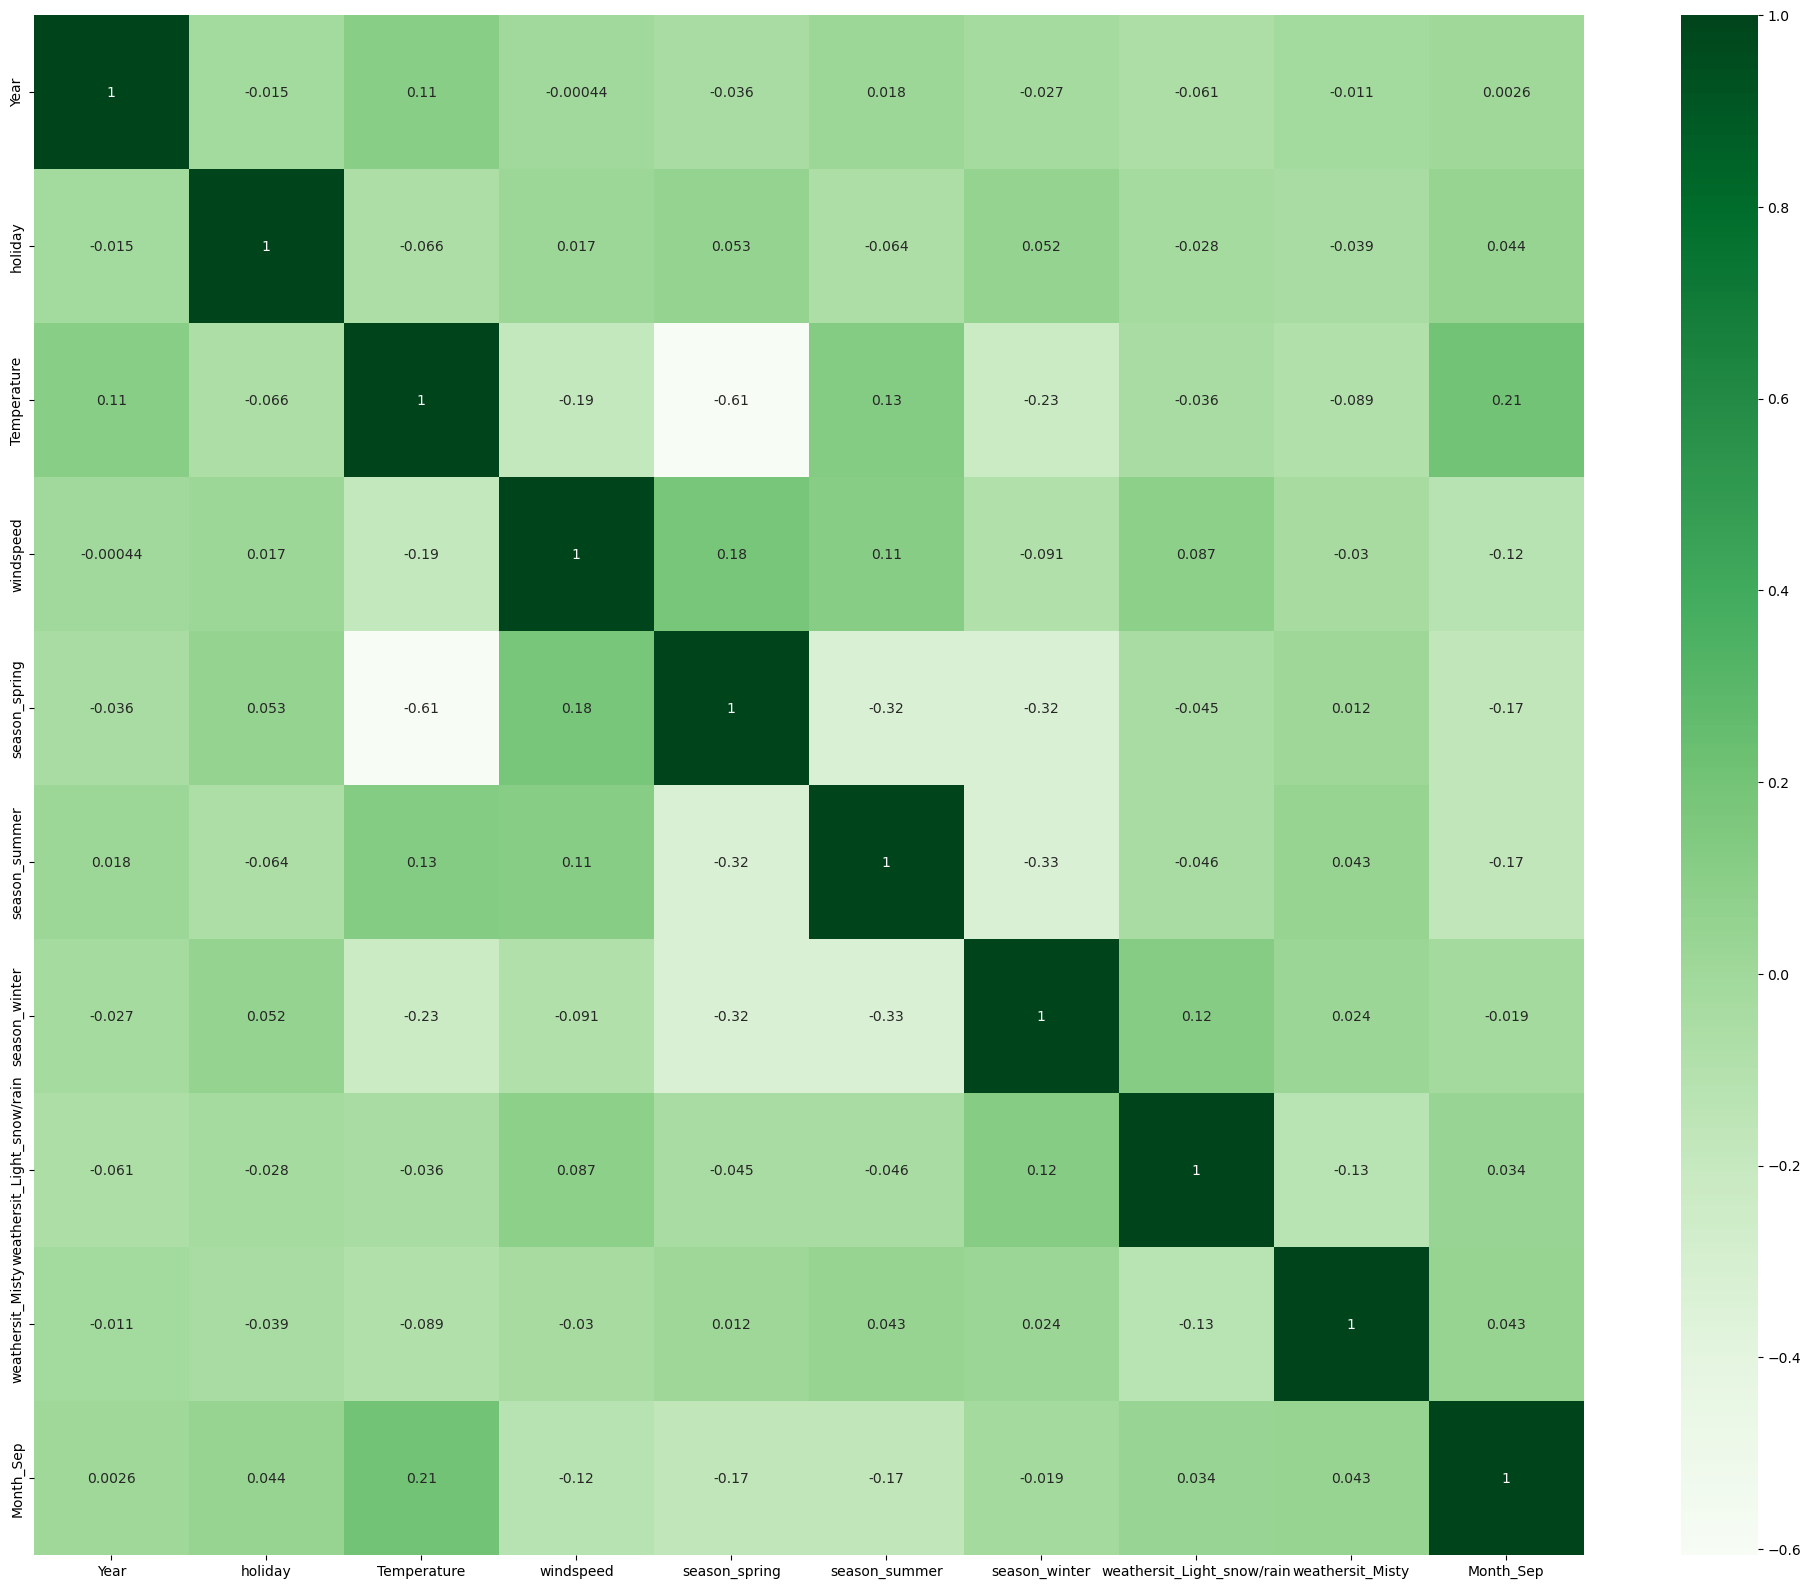

In [83]:
# Checking the coefficient corelations of all the feautures with each other
plt.figure(figsize=[25,20])
sns.heatmap(x_train_new.corr(),annot=True,cmap="Greens")
plt.show()

### RESIDUAL ANALYSIS

In [84]:
y_train_pred=lm.predict(x_train_rfe)

In [131]:
res=y_train-y_train_pred

<AxesSubplot:ylabel='Density'>

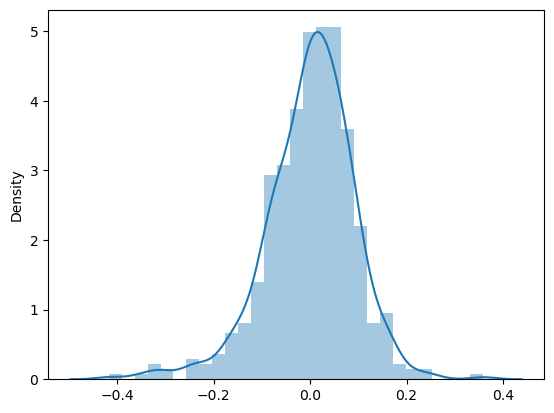

In [90]:
# The error terms are Normally distributed
sns.distplot(res)


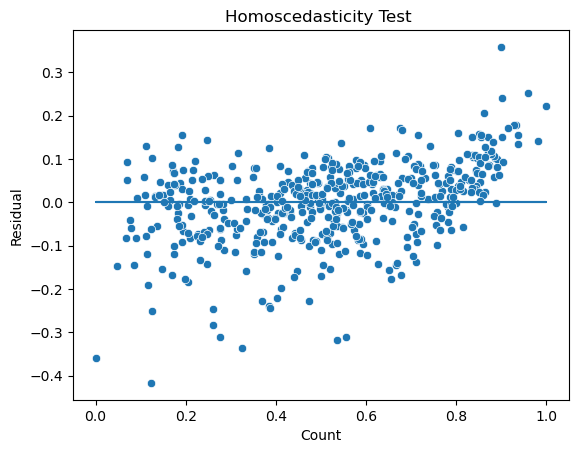

In [134]:
sns.scatterplot(y_train,(res))
plt.plot(y_train,(y_train - y_train))
plt.title('Homoscedasticity Test ')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### MAKING PREDICTIONS USING THE FINAL MODEL

In [91]:
df_test.head()

,Year,holiday,workingday,Temperature,feeling temperature,Humidity,windspeed,Total Count,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [95]:
df_test[col_1]=scaler.transform(df_test[col_1])

In [96]:
df_test.describe()

,Year,holiday,workingday,Temperature,feeling temperature,Humidity,windspeed,Total Count,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.027273,0.318182,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.163248,0.466833,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
# Segregating the x and y in the test sets 
y_test=df_test.pop("Total Count")
x_test=df_test

In [99]:
y_test.shape

(220,)

In [100]:
x_test.shape

(220, 29)

In [101]:
x_test

,Year,holiday,workingday,Temperature,feeling temperature,Humidity,windspeed,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
127,0,0,1,0.584649,0.577380,0.650923,0.069510,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
72,0,0,1,0.331557,0.332005,0.512107,0.203418,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [102]:
# The variables through which the model was built is considered as few of the variables are dropped.
x_test=x_test[x_train_new.columns]

In [103]:
x_test_sm=sm.add_constant(x_test)

In [104]:
x_test_sm.head()

,const,Year,holiday,Temperature,windspeed,season_spring,season_summer,season_winter,weathersit_Light_snow/rain,weathersit_Misty,Month_Sep
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0


In [105]:
y_test_pred=lm.predict(x_test_sm)

In [112]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: Total Count, Length: 220, dtype: float64

In [113]:
y_test_pred

184    0.400699
535    0.894906
299    0.401679
221    0.561750
152    0.563769
         ...   
702    0.725548
127    0.521945
640    0.789203
72     0.263720
653    0.718507
Length: 220, dtype: float64

### MODEL EVALUATION

In [120]:
# R-squared is caluculated

r2=round(r2_score(y_test,y_test_pred),3)
r2

0.804

Text(0, 0.5, 'y_test_pred')

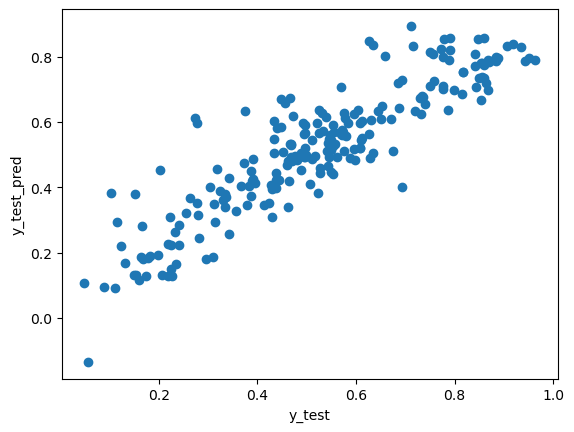

In [115]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")

In [123]:
# Caluculating the adjusted r-squared value of the test dataset
adjusted_r2 = round(1-(1-r2)*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7946


In [124]:
print(round(lm.params,4))

const                         0.1909
Year                          0.2341
holiday                      -0.0963
Temperature                   0.4777
windspeed                    -0.1481
season_spring                -0.0554
season_summer                 0.0621
season_winter                 0.0945
weathersit_Light_snow/rain   -0.2850
weathersit_Misty             -0.0787
Month_Sep                     0.0910
dtype: float64


Total_count= 0.1909+0.2341Year_0.0963 holiday +0.4777 Temperature-0.1481 windspeed-0.0554 season_spring + 0.0621 season_summer + 0.0945 season_winter-0.2850 weathersit_Light_snow/rain-0.0787 weathersit_Misty + 0.0910 Month_sep

### R-squared of Train dataset : 0.833
### Adj. R-squared of Train Dataset :0.829
### R-squared of Test dataset :0.804
### Adj. R-squared of Test Dataset :0.7946